In [1]:
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
import re

import plotly.graph_objs as go
import pandas as pd
import PortfolioLab as pl
import numpy as np

from datetime import date

today = date.today()

In [4]:
import PortfolioLab as pl
import pandas as pd

In [30]:
n_results=20

search_results = investpy.search_quotes(text='SPY', n_results=n_results)
for i in range(n_results):
#     print(i)
#     print(search_results[i])

0
{"id_": 1054724, "name": "SSgA SPDR S&P US Dividend Aristocrats", "symbol": "SPYD", "country": "austria", "tag": "/etfs/spdr-s-p-us-dividend-aristocrats?cid=1054724", "pair_type": "etfs", "exchange": "Vienna"}
1
{"id_": 46085, "name": "SSgA SPDR S&P 400 US Mid Cap", "symbol": "SPY4", "country": "germany", "tag": "/etfs/spdr-s-p-400-us-mid-cap?cid=46085", "pair_type": "etfs", "exchange": "Frankfurt"}
2
{"id_": 38150, "name": "SPDR\u00ae Portfolio S&P 500 Value ETF", "symbol": "SPYV", "country": "united states", "tag": "/etfs/spdr-s-p-500-value", "pair_type": "etfs", "exchange": "NYSE"}
3
{"id_": 46215, "name": "SPDR MSCI Europe Technology UCITS", "symbol": "SPYK", "country": "germany", "tag": "/etfs/spdr-msci-europe-info-tech?cid=46215", "pair_type": "etfs", "exchange": "Xetra"}
4
{"id_": 46216, "name": "SPDR MSCI Europe Materials UCITS", "symbol": "SPYP", "country": "germany", "tag": "/etfs/spdr-msci-europe-materials?cid=46216", "pair_type": "etfs", "exchange": "Xetra"}
5
{"id_": 462

In [10]:
import investpy

data_total = pd.DataFrame()

ISINs=['SPY']
names = ['SPY']
exchange =  [0]
x=0


for i in ISINs:

    search_results = investpy.search_quotes(text=i, n_results=5)
    print(search_results)
    data = search_results[exchange[x]].retrieve_historical_data(from_date='31/01/2020', to_date='31/01/2030')[['Close']]
    data_total = pl.merge_time_series(data_total, data)
    x+=1

data_total.columns = names
data_total = data_total.dropna()
data_total

[<investpy.utils.search_obj.SearchObj object at 0x0000026D25D2F2B0>, <investpy.utils.search_obj.SearchObj object at 0x0000026D25D2F160>, <investpy.utils.search_obj.SearchObj object at 0x0000026D13F927F0>, <investpy.utils.search_obj.SearchObj object at 0x0000026D25C8FAF0>, <investpy.utils.search_obj.SearchObj object at 0x0000026D25C8F0A0>]


,SPY
Date,
2020-01-31,52.39
2020-02-03,52.67
2020-02-04,53.52
2020-02-05,53.34
2020-02-06,54.60
...,...
2021-03-25,54.72
2021-03-26,55.53
2021-03-29,55.71


In [15]:
search_results = investpy.search_quotes(text='IE00BMVB5P51', n_results=2)
data = search_results[0].retrieve_historical_data(from_date='31/01/2020', to_date='31/01/2030')
data

,Open,High,Low,Close,Volume
Date,,,,,
2020-12-11,25.05,25.05,24.89,24.94,1000
2020-12-14,25.20,25.20,25.01,25.01,1039
2020-12-15,25.06,25.06,25.00,25.01,485
2020-12-16,25.10,25.17,25.08,25.17,1000
2020-12-17,25.19,25.27,25.19,25.23,2985
...,...,...,...,...,...
2021-03-25,26.00,26.04,25.92,25.99,564
2021-03-26,26.13,26.13,26.08,26.13,542
2021-03-29,26.18,26.25,26.17,26.18,1204


In [16]:
print(data)

            Open  High   Low  Close  Volume
Date                                       
2020-12-11 25.05 25.05 24.89  24.94    1000
2020-12-14 25.20 25.20 25.01  25.01    1039
2020-12-15 25.06 25.06 25.00  25.01     485
2020-12-16 25.10 25.17 25.08  25.17    1000
2020-12-17 25.19 25.27 25.19  25.23    2985
...          ...   ...   ...    ...     ...
2021-03-25 26.00 26.04 25.92  25.99     564
2021-03-26 26.13 26.13 26.08  26.13     542
2021-03-29 26.18 26.25 26.17  26.18    1204
2021-03-30 26.24 26.28 26.21  26.25      45
2021-03-31 26.23 26.32 26.23  26.30      10

[74 rows x 5 columns]


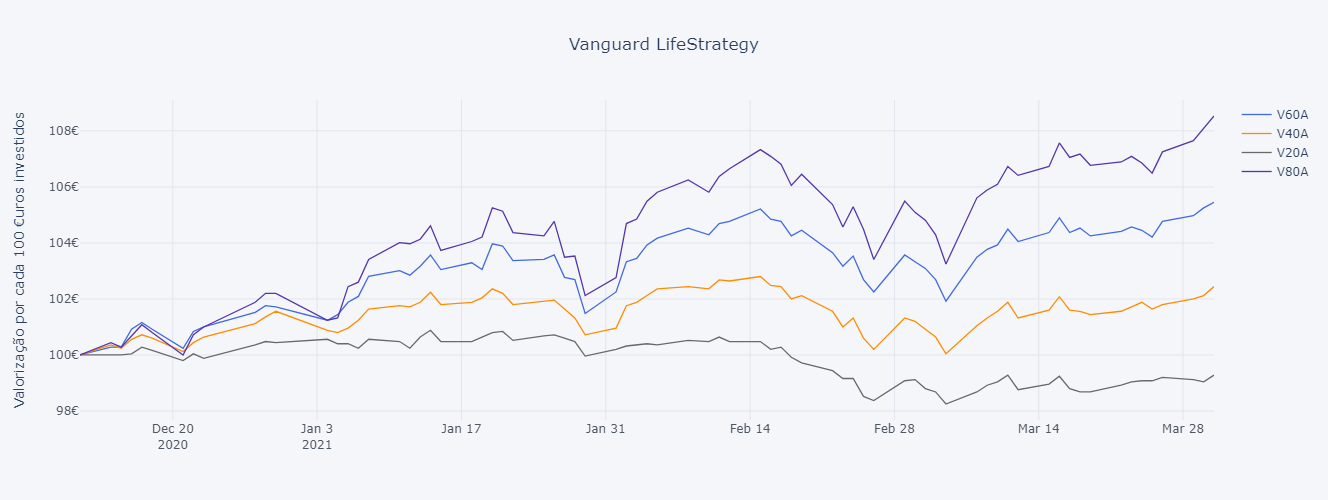

In [18]:
pl.ichart(round(pl.normalize(data_total), 2), title='Vanguard LifeStrategy',
          yticksuffix= '€', yTitle='Valorização por cada 100 €uros investidos', colab=False)

In [20]:
data_total = pl.merge_time_series(data_total, fundos, 'inner')

In [21]:
data_total_norm = pl.normalize(data_total)

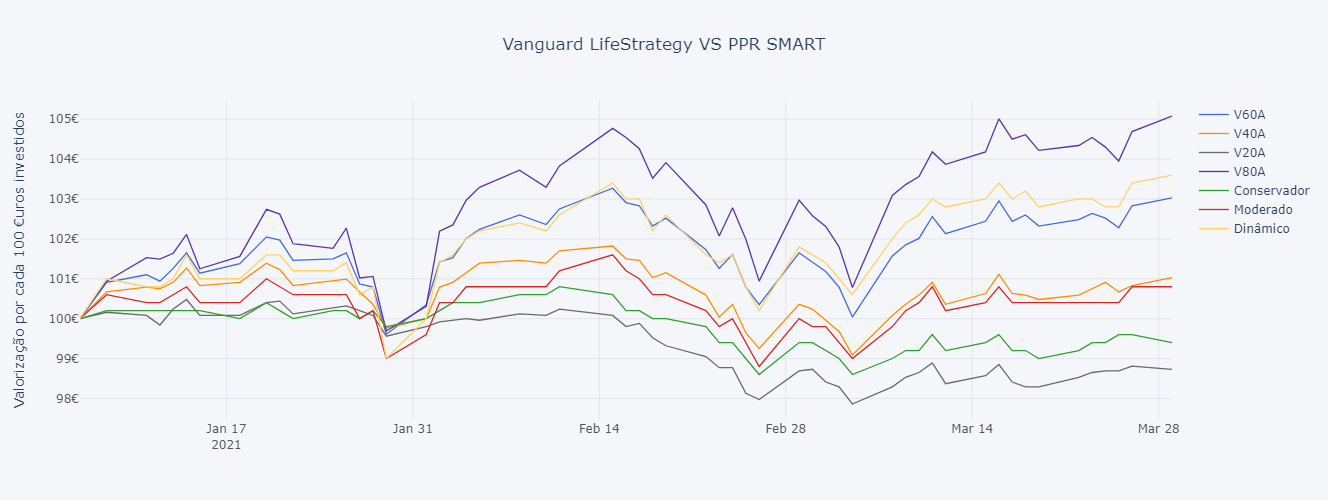

In [22]:
pl.ichart(round(data_total_norm, 2), title='Vanguard LifeStrategy VS PPR SMART',
          yticksuffix= '€', yTitle='Valorização por cada 100 €uros investidos', colab=False)

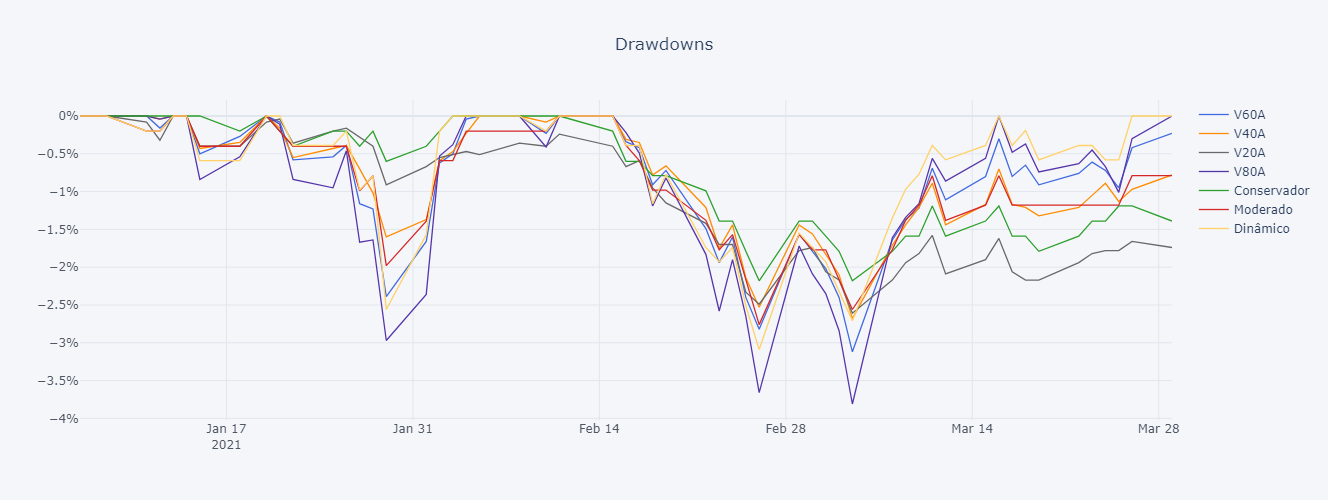

In [23]:
pl.ichart(round(pl.compute_drawdowns(data_total_norm * 100), 2), yticksuffix='%',
          title='Drawdowns', colab=False)

In [51]:
pl.compute_performance_table(data_total_norm[['Conservador', 'V20A']]).drop('CAGR', axis=1)

**Performance from 2021-01-06 to 2021-03-29 (≈ 0.2 years)**

,Return,StdDev,Sharpe,Max DD,MAR
Conservador,-0.60%,4.04%,-0.65,-2.18%,-1.20
V20A,-1.27%,4.27%,-1.28,-2.61%,-2.10


In [53]:
pl.compute_performance_table(data_total_norm[['V40A', 'Moderado']]).drop('CAGR', axis=1)

**Performance from 2021-01-06 to 2021-03-29 (≈ 0.2 years)**

,Return,StdDev,Sharpe,Max DD,MAR
V40A,1.03%,6.31%,0.73,-2.68%,1.72
Moderado,0.80%,6.73%,0.53,-2.76%,1.29


In [54]:
pl.compute_performance_table(data_total_norm[['V60A', 'Dinâmico']]).drop('CAGR', axis=1)

**Performance from 2021-01-06 to 2021-03-29 (≈ 0.2 years)**

,Return,StdDev,Sharpe,Max DD,MAR
V60A,3.03%,8.50%,1.65,-3.12%,4.49
Dinâmico,3.60%,9.54%,1.76,-3.09%,5.44


In [55]:
pl.compute_performance_table(data_total_norm[['V80A']]).drop('CAGR', axis=1)

**Performance from 2021-01-06 to 2021-03-29 (≈ 0.2 years)**

,Return,StdDev,Sharpe,Max DD,MAR
V80A,5.08%,12.11%,2.01,-3.81%,6.40


In [56]:
search_results = investpy.search_quotes(text='IE00BMVB5M21', n_results=2)
print(search_results[1])
data = search_results[1].retrieve_historical_data(from_date='31/01/2020', to_date='31/01/2030')[['Close']]
data.columns=['V40A']
data

{"id_": 1168623, "name": "Vanguard LifeStrategy 40% Equity UCITS ETF (EUR) Accumulating", "symbol": "V40A", "country": "germany", "tag": "/etfs/v40a", "pair_type": "etfs", "exchange": "Xetra"}


,V40A
Date,
2020-12-11,24.99
2020-12-14,25.07
2020-12-15,25.07
2020-12-16,25.15
2020-12-17,25.19
...,...
2021-03-25,25.43
2021-03-26,25.50
2021-03-29,25.52


In [25]:
import pandas as pd

# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

MSid = ['F000016BE4', 'F000016BE5', 'F000016BE6', 'F0GBR057ZA'] #175

Nomes = ['Conservador', 'Moderado', 'Dinâmico', 'AR'] # 175

fundos = pd.DataFrame()

# Download
for ticker in MSid:
    try:
        url = "https://lt.morningstar.com/api/rest.svc/timeseries_price/2nhcdckzon?id=" + str(ticker) + "&currencyId=BAS&idtype=Morningstar&frequency=daily&startDate=" + Begin + "&outputType=CSV"
        fundo = pd.read_csv(url, sep = ";" , index_col = 'date', parse_dates = True)
        fundo =  fundo.drop('Unnamed: 2', 1)
        fundos = fundos.merge(fundo, left_index = True, right_index = True, how='outer')
    except:
        print('Download of fund ' + ticker + ' failed')
        
fundos.columns = Nomes
fundos = fundos.dropna()
fundos = pl.normalize(fundos)

In [ ]:
pl.ichart(round(fundos, 2), title='AR PPR VS PPR SMART desde 2021-01-06', yticksuffix= '€', yTitle='Valorização por cada 100 €uros investidos', colab=False)

In [27]:
import investpy
search_results = investpy.search_quotes(text='LU0114721508', n_results=2)
print(search_results[0])

{"id_": 1039129, "name": "Fidelity Funds - Global Consumer Industries Fund A-dist-eur", "symbol": "0P00000EDH", "country": "luxembourg", "tag": "/funds/global-consumer-industries-fund-a-e", "pair_type": "funds", "exchange": "Luxembourg"}


In [28]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers = ['IPO.US']
ETF_Tickers =['IPO']

ETFs2 = pd.DataFrame()

# Download
for ticker in Tickers:
    try:
        url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
        ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
        ETFs2 = ETFs2.merge(ETF, left_index = True, right_index = True, how='outer')
    except:
        print('Download of fund ' + ticker + ' failed')
    
ETFs2.columns = ETF_Tickers
ETFs2 = ETFs2.fillna(method='ffill')
ETFs2 = ETFs2.replace(to_replace=0, method='ffill')

ETFs2 = ETFs2.loc['2000-07-07':]

In [29]:
IPO = ETFs2.copy()

In [30]:
pl.ichart(IPO)

In [31]:
pl.ichart(round(pl.compute_drawdowns(IPO), 2), colors=['darkorange'], yticksuffix='%')   

In [32]:
pl.compute_performance_table(IPO)

**Performance from 2013-10-21 to 2021-03-30 (≈ 7.4 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
IPO,16.18%,205.58%,23.76%,0.68,-38.47%,0.42


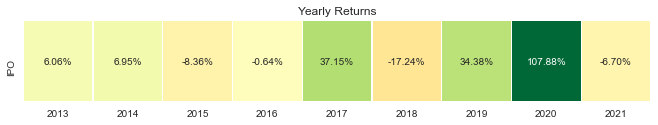

In [33]:
IPO.index = pd.to_datetime(IPO.index)
pl.compute_yearly_returns(IPO, style='chart');

In [34]:
# Downloading funds and creating quotes and returns dataframes
Begin = '2000-03-10'
# End = '2017-08-20' # Só activas se quiseres que acabe num dia especifíco 

Tickers = ['PFF.US']
ETF_Tickers =['PFF']

ETFs2 = pd.DataFrame()

# Download
for ticker in Tickers:
    try:
        url = "https://eodhistoricaldata.com/api/eod/" + str(ticker) + "?api_token=5c982bff80deb2.22427269&period=d."
        ETF = pd.read_csv(url, index_col = 'Date', parse_dates = True)[['Adjusted_close']].iloc[:-1, :]
        ETFs2 = ETFs2.merge(ETF, left_index = True, right_index = True, how='outer')
    except:
        print('Download of fund ' + ticker + ' failed')
    
ETFs2.columns = ETF_Tickers
ETFs2 = ETFs2.fillna(method='ffill')
ETFs2 = ETFs2.replace(to_replace=0, method='ffill')

ETFs2 = ETFs2.loc['2010':'2019']
PFF = ETFs2.copy()

In [35]:
pl.ichart(PFF)

In [36]:
pl.ichart(round(pl.compute_drawdowns(PFF), 2), colors=['darkorange'], yticksuffix='%')

In [37]:
pl.compute_performance_table(PFF)

**Performance from 2010-01-04 to 2018-12-31 (≈ 9.0 years)**

,CAGR,Return,StdDev,Sharpe,Max DD,MAR
PFF,5.46%,61.31%,7.59%,0.72,-15.18%,0.36


In [38]:
# PFF.index = pd.to_datetime(PFF.index)
# pl.compute_yearly_returns(PFF, style='chart');

In [39]:
init = 100000
ref = 30000
tx = 0.05
years = 15

In [40]:
%time
for tx in np.arange(0.0, 0.2, 0.0001):
    value = init
    for i in range(1, 16):
        # print(i)
        value = value * ((1 + tx)) + ref
    if value > 1000000:
        print(tx)
        break

Wall time: 0 ns
0.0669


In [41]:
init = 100000
ref = 30000
years = 15
tx= 0.0668

value = init

for i in range(1, 16):
    # print(i)
    value = value * ((1 + tx)) + ref

print(value)

999329.7324495681


In [42]:
CF = 1000000
PV = 100000
N = 15

In [43]:
((FCF/PV)**(1/N))-1

NameError: name 'FCF' is not defined

In [ ]:
value = 100000  * ((1 + tx)) + 30000